# Phase 1 - Week 1 - Day 3 AM - Feature Engineering - Part 1

# A. Cardinality

## A.1 - Definition

The values of a categorical variable are selected from a group of categories, also called labels. For example, in the variable `gender` the categories or labels are male and female, whereas in the variable `city` the labels can be London, Manchester, Brighton and so on.

Different categorical variables contain different number of labels or categories. The variable gender contains only 2 labels, but a variable like city or postcode, can contain a huge number of different labels.

The number of different labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as __high cardinality__.

---

High cardinality may pose the following problems:

- Variables with too many labels **tend to dominate** over those with only a few labels, particularly in **Tree based** algorithms.

- A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models **prone to over-fit**.

- Some of the labels may **only be present in the training data set, but not in the test set**, therefore machine learning algorithms may over-fit to the training set.

- Contrarily, **some labels may appear only in the test set**, therefore leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

In particular, **tree methods can be biased towards variables with lots of labels** (variables with high cardinality). Thus, their performance may be affected by high cardinality.

## A.2 - Purpose

We will :

- Learn how to quantify cardinality
- See examples of high and low cardinality variables
- Understand the effect of cardinality when preparing train and test sets
- Visualise the effect of cardinality on Machine Learning Model performance

We will use the [Titanic](https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv) dataset.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the Titanic dataset

url = 'https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's focus on several categorical variables in this dataset : `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked`.

In [4]:
# Let's inspect the cardinality, this is the number of different labels, for the different categorical variables

print('Number of categories in the variable Name     : {}'.format(len(data.Name.unique())))
print('Number of categories in the variable Sex      : {}'.format(len(data.Sex.unique())))
print('Number of categories in the variable Ticket   : {}'.format(len(data.Ticket.unique())))
print('Number of categories in the variable Cabin    : {}'.format(len(data.Cabin.unique())))
print('Number of categories in the variable Embarked : {}'.format(len(data.Embarked.unique())))
print('Total number of passengers in the Titanic.    : {}'.format(len(data)))

Number of categories in the variable Name     : 891
Number of categories in the variable Sex      : 2
Number of categories in the variable Ticket   : 681
Number of categories in the variable Cabin    : 148
Number of categories in the variable Embarked : 4
Total number of passengers in the Titanic.    : 891


While the variable `Sex` contains only 2 categories and `Embarked` 4 (low cardinality), the variables `Ticket`, `Name` and `Cabin`, as expected, contain a huge number of different labels (high cardinality).

## A.3 - Experiment

To demonstrate the effect of high cardinality in train and test sets and machine learning performance, let's work with the variable `Cabin`. We will create a new variable to reduced cardinality.

In [5]:
# Let's explore the values / categories of `Cabin`
# We know from the previous cell that there are 148 different cabins, therefore the variable is highly cardinal

data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Let's now reduce the cardinality of the variable. How? Instead of using the entire `Cabin` value, we will capture only the
**first letter**.

***Rationale***: the first letter indicates the deck on which the cabin was located, and is therefore an indication of both social class status and proximity to the surface of the Titanic. Both are known to improve the probability of survival.

In [6]:
# Let's capture the first letter of Cabin

data['Cabin_reduced'] = data['Cabin'].astype(str).str[0]

print(data[['Cabin', 'Cabin_reduced']].head())
print('Number of categories in the variable Cabin : {}'.format(len(data.Cabin.unique())))
print('Number of categories in the variable Cabin reduced : {}'.format(len(data.Cabin_reduced.unique())))

  Cabin Cabin_reduced
0   NaN             n
1   C85             C
2   NaN             n
3  C123             C
4   NaN             n
Number of categories in the variable Cabin : 148
Number of categories in the variable Cabin reduced : 9


In [7]:
# Our final dataset

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_reduced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


**We reduced the number of different labels from 148 to 9.**

In [8]:
# Create datasets with and without reduced cabins

data_without_reduced_cabin = data.drop('Cabin_reduced', axis=1)
data_with_reduced_cabin = data.drop('Cabin', axis=1)

In [9]:
# Show data without reduced cabins

data_without_reduced_cabin.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Show data with reduced cabins

data_with_reduced_cabin.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_reduced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,n


In [11]:
# Let's separate into training and testing set in order to build machine learning models
# For simplicity, we only use feature `cabin` and `sex`

## For data without reduced cabins
use_cols = ['Cabin', 'Sex']
X_train_without_reduced, X_test_without_reduced, y_train_without_reduced, y_test_without_reduced = train_test_split(data[use_cols], data['Survived'], test_size=0.3, random_state=0)

## For data with reduced cabins
use_cols = ['Cabin_reduced', 'Sex']
X_train_with_reduced, X_test_with_reduced, y_train_with_reduced, y_test_with_reduced = train_test_split(data[use_cols], data['Survived'], test_size=0.3, random_state=0)

## Show shapes
X_train_without_reduced.shape, X_test_without_reduced.shape

((623, 2), (268, 2))

### A.3.1 - Effect 1 : Uneven Distribution of Categories in Train-Set and Test-Set

**When a variable is highly cardinal, often some categories land only on the training set, or only on the testing set.** If present only in the training set, they may lead to over-fitting. If present only on the testing set, the machine learning algorithm will not know how to handle them, as it has not seen them during training.

In [12]:
# Let's find out labels that only present in the training set and labels that only present in the test set

unique_to_train_set = [x for x in X_train_without_reduced['Cabin'].unique() if x not in X_test_without_reduced['Cabin'].unique()]
unique_to_test_set = [x for x in X_test_without_reduced['Cabin'].unique() if x not in X_train_without_reduced['Cabin'].unique()]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  100
Total unique_to_test_set  :  28


There are **100 Cabins only present in the training set**, and not in the testing set. Also, there are **28 Cabins that only present in the test set** but not in the train set.

Variables with high cardinality tend to have values (i.e., categories) present in the training set, that are not present in the test set, and vice versa. This will bring problems at the time of training (due to over-fitting) and scoring of new data (how should the model deal with unseen categories?). This problem is almost overcome by reducing the cardinality of the variable.

In [13]:
# Let's find out labels that only present in the training set and only present in the test set with reduced cardinality

unique_to_train_set = [
    x for x in X_train_with_reduced['Cabin_reduced'].unique()
    if x not in X_test_with_reduced['Cabin_reduced'].unique()
]

unique_to_test_set = [
    x for x in X_test_with_reduced['Cabin_reduced'].unique()
    if x not in X_train_with_reduced['Cabin_reduced'].unique()
]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  1
Total unique_to_test_set  :  0


Observe how by reducing the cardinality there is now **only 1 label in the training set** that is not present in the test set. And **no label in the test set** that is not contained in the training set as well.

### A.3.2 - Effect 2 : Model Performance

In order to evaluate the effect of categorical variables in machine learning models, we will quickly replace the categories by numbers. See below.

In [14]:
# Feature encoding for data without reduced cabins

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

X_train_without_reduced = ohe.fit_transform(X_train_without_reduced)
X_test_without_reduced = ohe.transform(X_test_without_reduced)

In [15]:
# Feature encoding for data with reduced cabins

from sklearn.preprocessing import OneHotEncoder

ohe2 = OneHotEncoder(handle_unknown='ignore')

X_train_with_reduced = ohe2.fit_transform(X_train_with_reduced)
X_test_with_reduced = ohe2.transform(X_test_with_reduced)

#### Random Forests

In [16]:
# Model built on data with high cardinality for `Cabin` (without reduced cabins)

## Call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

## Train the model
rf.fit(X_train_without_reduced, y_train_without_reduced)

## Make predictions on train and test set
pred_train = rf.predict_proba(X_train_without_reduced)
pred_test = rf.predict_proba(X_test_without_reduced)

print('Train set - Random Forests roc-auc: {}'.format(roc_auc_score(y_train_without_reduced, pred_train[:,1])))
print('Test set  - Random Forests roc-auc: {}'.format(roc_auc_score(y_test_without_reduced, pred_test[:,1])))

Train set - Random Forests roc-auc: 0.8690212793648728
Test set  - Random Forests roc-auc: 0.788452380952381


We observe that the performance of the Random Forests on the training set is quite superior to its performance in the test set. This indicates that the model is over-fitting, which means that it does a great job at predicting the outcome on the dataset it was trained on, but it lacks the power to generalise the prediction to unseen data.

In [17]:
# Model built on data with low cardinality for `Cabin` (with reduced cabins)

## Call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

## Train the model
rf.fit(X_train_with_reduced, y_train_with_reduced)

## Make predictions on train and test set
pred_train = rf.predict_proba(X_train_with_reduced)
pred_test = rf.predict_proba(X_test_with_reduced)

print('Train set - Random Forests roc-auc: {}'.format(roc_auc_score(y_train_with_reduced, pred_train[:,1])))
print('Test set  - Random Forests roc-auc: {}'.format(roc_auc_score(y_test_with_reduced, pred_test[:,1])))

Train set - Random Forests roc-auc: 0.8199550985878832
Test set  - Random Forests roc-auc: 0.8332142857142857


We can see now that the Random Forests no longer overfit to the training set. In addition, the model is much better at generalising the predictions.

**Given a same model, with identical hyperparameters, high cardinality may cause the model to overfit**.

#### KNN

In [18]:
# Model built on data with high cardinality for `Cabin` (without reduced cabins)

## Call the model
knn = KNeighborsClassifier(n_neighbors=7)

## Train the model
knn.fit(X_train_without_reduced, y_train_without_reduced)

## Make predictions on train and test set
pred_train = knn.predict_proba(X_train_without_reduced)
pred_test = knn.predict_proba(X_test_without_reduced)

print('Train set - Logistic regression roc-auc: {}'.format(roc_auc_score(y_train_without_reduced, pred_train[:,1])))
print('Test set  - Logistic regression roc-auc: {}'.format(roc_auc_score(y_test_without_reduced, pred_test[:,1])))

Train set - Logistic regression roc-auc: 0.8269777228259689
Test set  - Logistic regression roc-auc: 0.7795833333333333


In [19]:
# Model built on data with low cardinality for `Cabin` (with reduced cabins)

# Call the model
knn = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn.fit(X_train_with_reduced, y_train_with_reduced)

# Make predictions on train and test set
pred_train = knn.predict_proba(X_train_with_reduced)
pred_test = knn.predict_proba(X_test_with_reduced)

print('Train set - Logistic regression roc-auc: {}'.format(roc_auc_score(y_train_with_reduced, pred_train[:,1])))
print('Test set  - Logistic regression roc-auc: {}'.format(roc_auc_score(y_test_with_reduced, pred_test[:,1])))

Train set - Logistic regression roc-auc: 0.7899557493329863
Test set  - Logistic regression roc-auc: 0.7852380952380952


Same with Random Forest, in KNN, the model is much better at generalising the predictions.

A.3.4 - Conclusion

| Algorithnm | Train-Set (without reduced cabin) | Test-Set (without reduced cabin) | Train-Set (with reduced cabin) | Test-Set (with reduced cabin)
| --- | --- | --- | --- | --- |
| Random Forest | 0.869 | 0.788 | 0.820 | 0.833|
| KNN | 0.827 | 0.780 | 0.790 | 0.785 |


We can draw the same conclusion : **reducing the cardinality improves the performance and generalisation of the algorithm**.

# B. Outliers Handling

## B.1 - Load Dataset

In [20]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

For this experiment, we will use [Titanic](https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv) dataset.

In [21]:
# Load dataset

titanic_dataset = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# Check info of the dataset

titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Outlier only exist in numeric column. For this experiment, we will use column `Age` and `Fare`

In [23]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(titanic_dataset[['Age', 'Fare']], titanic_dataset['Survived'], test_size=0.3, random_state=0)

print('Size Train Set : ', X_train.shape)
print('Size Test Set  : ', X_test.shape)
X_train

Size Train Set :  (623, 2)
Size Test Set  :  (268, 2)


,Age,Fare
857,51.0,26.5500
52,49.0,76.7292
386,1.0,46.9000
124,54.0,77.2875
578,NaN,14.4583
...,...,...
835,39.0,83.1583
192,19.0,7.8542
629,NaN,7.7333
559,36.0,17.4000


In order to decide which method to utilise to detect outliers, we first need to know the distribution of the variable :
* In normally distributed variables : **Outliers = mean ± 3*std**.
* In skewed distributed variables : **outliers is above upper boundary and less than lower boundary**. Find the boundary with the formula :
  - Upper boundary = Q3 + (IQR * 1.5)
  - Lower boundary = Q1 - (IQR * 1.5)
  - while IQR = Q3 - Q1

We can also use boxplots to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable utilising the first quartile, the median, the third quartile and the whiskers. **Remember, the outliers shows from boxplot is valid for skewed distribution only.**

Looking at a boxplot, you can easily identify:

- The median, indicated by the line within the box.
- The inter-quantile range (IQR), the box itself.
- The quantiles, 25th (Q1) is the lower and 75th (Q3) the upper end of the box.
- The wiskers, which extend to:
  - top whisker: Q3 + 1.5 x IQR
  - bottom whisker: Q1 -1.5 x IQR

In [24]:
# Let's check whether a distribution is normal or not

print('Distribution of column `Age`  : ', X_train['Age'].skew())
print('Distribution of column `Fare` : ', X_train['Fare'].skew())

Distribution of column `Age`  :  0.3361317253050765
Distribution of column `Fare` :  4.841641117637748


The normal distribution will have a skewness ranging from `-0.5` to `0.5`. Any distribution outside this range is considered a skewed distribution.

From the result above, we can conclude :
* Column `Age` : normal distribution
* Column `Fare` : skewed distribution

In [25]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

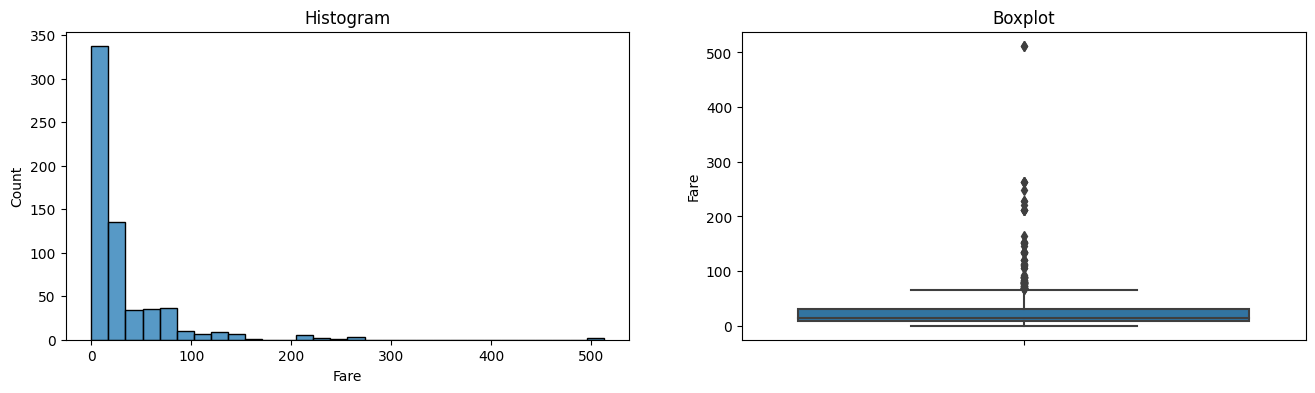

In [26]:
# Let's visualize skewed distribution using boxplot

diagnostic_plots(X_train, 'Fare')

`Fare` is very skewed and shows some unusual values at the right end of its distribution.

## B.2 - Detect the Outliers

### B.2.1 - Normal Distribution

In [27]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [28]:
# Calculate boundaries for `Age` in the titanic

upper_boundary_age, lower_boundary_age = find_normal_boundaries(X_train, 'Age')
upper_boundary_age, lower_boundary_age

(73.43632005918369, -13.605642768347035)

The upper boundary is **73 years**, which means that passengers older than 73 were very few, if any, in the titanic. The lower boundary is negative. Because negative age does not exist, it only makes sense to look for outliers utilising the upper boundary.

In [29]:
# Lets look at the number and percentage of outliers

print('Total passengers         : {}'.format(len(X_train)))
print('Passengers older than 73 : {}'.format(len(X_train[X_train['Age'] > upper_boundary_age])))
print('')
print('% of passengers older than 73 : {}'.format(len(X_train[X_train['Age'] > upper_boundary_age]) / len(X_train) * 100))

Total passengers         : 623
Passengers older than 73 : 2

% of passengers older than 73 : 0.32102728731942215


There were 2 passengers older than 73 on board of the titanic, which could be considered outliers, as the majority of the population where much younger.

### B.2.2 - Skewed Distribution

In [30]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [31]:
# Identify outliers in `Fare` in the titanic dataset. Lets look again for extreme values using IQR * 3

upper_boundary_fare, lower_boundary_fare = find_skewed_boundaries(X_train, 'Fare', 3)
upper_boundary_fare, lower_boundary_fare

(101.77499999999999, -62.46249999999999)

In [32]:
# Lets look at the number and percentage of passengers who paid extremely high Fares

print('Total passengers : {}'.format(len(X_train)))
print('Passengers who paid more than 117   : {}'.format(len(X_train[X_train['Fare'] > upper_boundary_fare])))
print('')
print('% passengers who paid more than 117 : {}'.format(len(X_train[X_train['Fare'] > upper_boundary_fare])/len(X_train) * 100))

Total passengers : 623
Passengers who paid more than 117   : 36

% passengers who paid more than 117 : 5.778491171749598


For `Fare`, as well as for all the other variables in this notebook which show a tail to the right, the lower boundary is negative. So we will use the upper boundary to determine the outliers. We observe that 5.7% of the values of the dataset fall above the boundary.

## B.3 - Handling the Outliers

There are two popular methods to handling the outliers :

1. Trimming or truncation
   - Trimming, also known as truncation, involves removing the outliers from the dataset.
   - Advantage : quick
   - Limitations :
     - Outliers for one variable could contain useful information in the other variables
     - If there are outliers across many variables, we could remove a big chunk of dataset
   - **IMPORTANT NOTES** : if you are using this technique, outliers should be detected AND **removed ONLY** from the training set, and NOT from the test set. So we should first divide our data set into train and tests, and remove outliers in the train set, but keep those in the test set, and measure how well our model is doing.

2. Censoring or capping
   - Censoring or capping means capping the maximum and/or minimum of a distribution at an arbitrary value.
   - On other words, values bigger or smaller than the arbitrarily determined ones are censored.
   - Capping can be done at both tails, or just one of the tails, depending on the variable and the user.
   - Advantage : does not remove data
   - Limitations :
     - Distorts the distributions of the variables
     - Distorts the relationships among variables
   - **IMPORTANT NOTES** : if you are using this technique, when doing capping, **we tend to cap values both in train set and test set**. It is important to remember that **the capping values MUST be derived from the train set**. And then use those same values to cap the variables in the test set

### B.3.1 - Trimming or truncation

In [33]:
# Flag the outliers in category `Age`
outliers_age = np.where(X_train['Age'] > upper_boundary_age, True,
                       np.where(X_train['Age'] < lower_boundary_age, True, False))

# Flag the outliers in category `Fare`
outliers_fare = np.where(X_train['Fare'] > upper_boundary_fare, True,
                       np.where(X_train['Fare'] < lower_boundary_fare, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_age + outliers_fare)]

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (623, 2)
Size dataset - After trimming  :  (585, 2)


We can see that using trimming, **we removed 38 rows**, from a dataset of 623 rows. This is about **4.49 %** of the data was removed. If only a few variables present a tiny proportion of outliers, trimming could work.

 ---
 **IMPORTANT NOTES**

 when we remove data points from our dataset, all the parameters of the distribution are re-calculated, those are the mean, quantiles and inter-quantile range, therefore, in the new -trimmed- variable, values that before were not considered outliers, now are. This is an unwanted characteristic of this way of coping with outliers. Perform outliers handling only one time process only.

### B.3.2 - Censoring or capping

To handling the outliers, we will use library called [feature-engine](https://feature-engine.trainindata.com/en/latest/index.htm). First, we need to install the package.

In [34]:
# Install feature-engine library

!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 2.2 MB/s eta 0:00:00


Becase there are 2 type distibutions in this dataset, normal distribution and skewed distribution, we will do censoring 2 times.

In [35]:
# First, capping the normal distribution

from feature_engine.outliers import Winsorizer

winsoriser_age = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['Age'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

The results of the previous capping process will be used to carry out the second capping. **Don't worry, the previous capping value will not change because the capping process is done in a different column.**

In [36]:
# Capping the skewed distribution

from feature_engine.outliers import Winsorizer

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['Fare'])

X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

Age - Before Capping


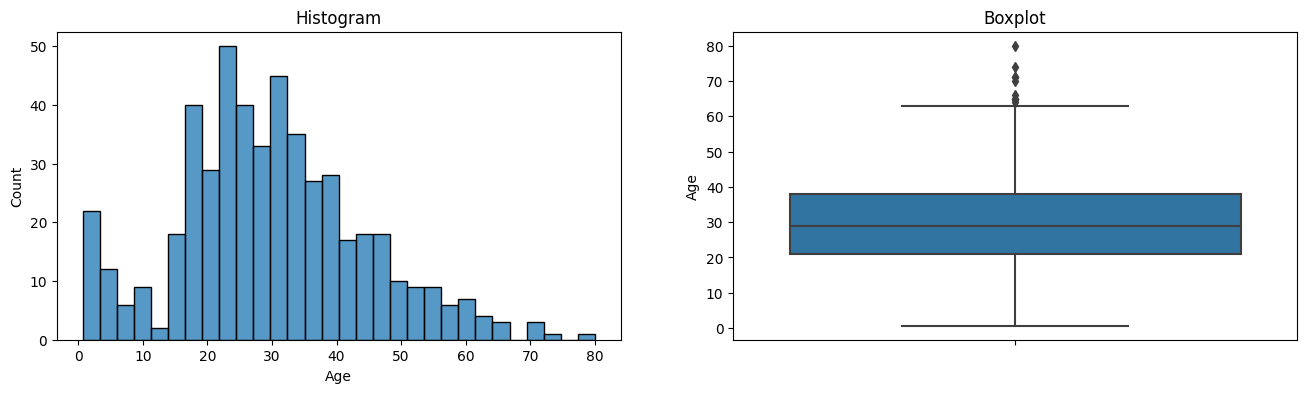


Age - After Capping


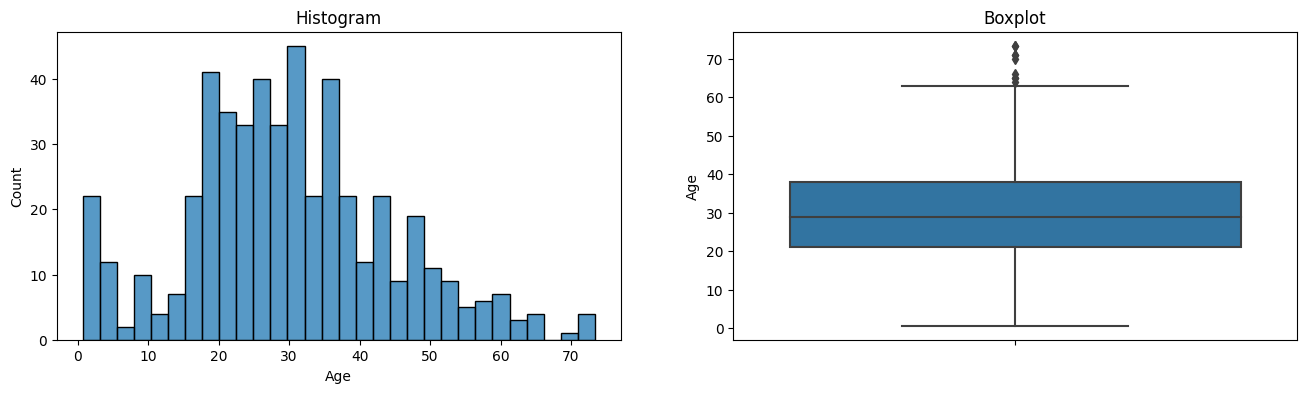


Fare - Before Capping


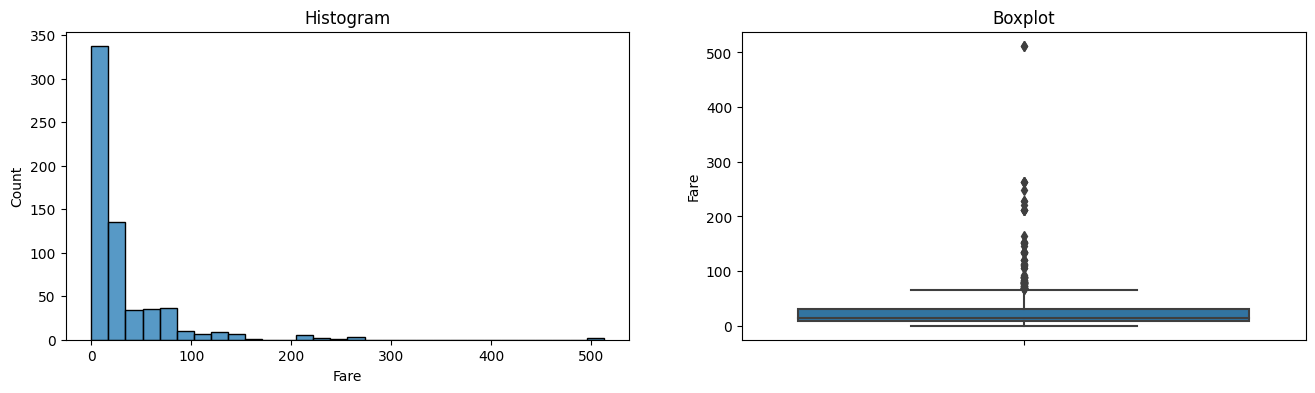


Fare - After Capping


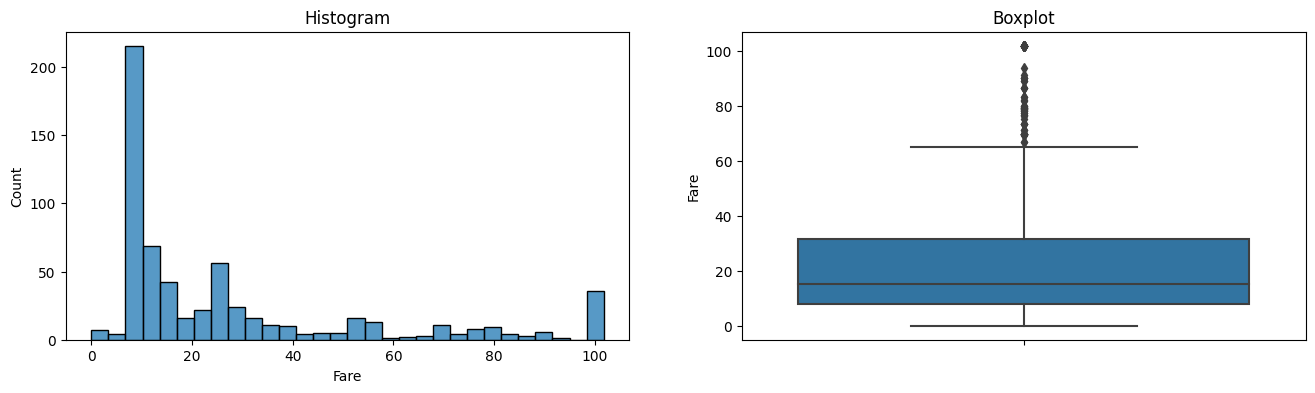

In [37]:
# Check the distribution before and after capping

print('Age - Before Capping')
diagnostic_plots(X_train, 'Age')

print('\nAge - After Capping')
diagnostic_plots(X_train_capped, 'Age')

print('\nFare - Before Capping')
diagnostic_plots(X_train, 'Fare')

print('\nFare - After Capping')
diagnostic_plots(X_train_capped, 'Fare')

We can see that **in the right-tail (upper tail), there has been an increase in the amount of data due to this capping process**, both for the `Age` and `Fare` features.